discoluser this code was build using the keras example mainly at this link : http://keras.io/examples/vision/image_classification_from_scratch/

In [1]:
from google.colab import drive
import zipfile
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/MyDrive/rare_species 1.zip'
extract_path = '/content/rare_species 1'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Imports

In [3]:
import numpy as np
import pandas as pd
import os
import shutil
import keras
from keras import layers
from tensorflow import data as tf_data
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import RandAugment
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np



In [4]:
# With colab
folder_path = '/content/rare_species 1/rare_species 1'
meta = pd.read_csv('/content/rare_species 1/rare_species 1/metadata.csv')

# With vscode
# folder_path = '../data/rare_species 1'
# meta = pd.read_csv('../data/rare_species 1/metadata.csv')

In [5]:
print(f"the diferent Phylum are: \n{meta['phylum'].unique()}")
print(f"each phylum contains :  \n{meta['phylum'].value_counts()}")

print(f"their is {meta['family'].nunique()} different families")

meta

the diferent Phylum are: 
['mollusca' 'chordata' 'arthropoda' 'echinodermata' 'cnidaria']
each phylum contains :  
phylum
chordata         9952
arthropoda        951
cnidaria          810
mollusca          210
echinodermata      60
Name: count, dtype: int64
their is 202 different families


rare_species_id  eol_content_id  eol_page_id  \
0      75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1      28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2      00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3      29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4      94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   
...                                     ...             ...          ...   
11978  1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89        29734618      1011315   
11979  628bf2b4-6ecc-4017-a8e6-4306849e0cfc        29972861      1056842   
11980  0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9        30134195     52572074   
11981  27fdb1e9-c5fb-459a-8b6a-6fb222b1c512         9474963     46559139   
11982  54894a59-151f-4814-ac32-3a336841e58e         9465817       326525   

        kingdom    phylum            family  \
0      animalia  mollusca         unionidae   
1      animalia  chordata       geoemydidae   
2      animalia  chordata  cryptobranchidae   
3      animalia  chordata          turdidae   
4      animalia  chordata         indriidae   
...         ...       ...               ...   
11978  animalia  chordata         leporidae   
11979  animalia  chordata          emydidae   
11980  animalia  chordata        dasyatidae   
11981  animalia  chordata        mustelidae   
11982  animalia  chordata         lemuridae   

                                               file_path  
0      mollusca_unionidae/12853737_449393_eol-full-si...  
1      chordata_geoemydidae/20969394_793083_eol-full-...  
2      chordata_cryptobranchidae/28895411_319982_eol-...  
3      chordata_turdidae/29658536_45510188_eol-full-s...  
4      chordata_indriidae/21252576_7250886_eol-full-s...  
...                                                  ...  
11978  chordata_leporidae/29734618_1011315_eol-full-s...  
11979  chordata_emydidae/29972861_1056842_eol-full-si...  
11980  chordata_dasyatidae/30134195_52572074_eol-full...  
11981  chordata_mustelidae/9474963_46559139_eol-full-...  
11982  chordata_lemuridae/9465817_326525_eol-full-siz...  

[11983 rows x 7 columns]

In [6]:
# With colab
current_locations = '/content/rare_species 1/rare_species 1'

# with vscode
# current_locations = '../data/rare_species 1'

for _, row in meta.iterrows():

    phylum = row['phylum']
    file_path = row['file_path']


    file_location = os.path.join(current_locations, file_path)

    # create a a detination folder keeping the subfolder structure

        # with colab
    target_folder = os.path.join(phylum, os.path.dirname(file_path))

        # with vscode
    # target_folder = os.path.join("../data" , phylum, os.path.dirname(file_path))

    os.makedirs(target_folder, exist_ok=True)  # Make sure the folder exists

    # Final destination path
    destination = os.path.join(target_folder, os.path.basename(file_path))

    # Copy the file if it exists
    if os.path.exists(file_location):
        shutil.copy2(file_location, destination)
    else:
        print(f"Couldn't find the file: {file_location}")



# Split the data

In [7]:
# with colab
path_phylum_athropoda = "/content/arthropoda"
path_phylum_chordata = "/content/chordata"
path_phylum_cnidaria = "/content/cnidaria"
path_phylum_mollusca = "/content/mollusca"

# with vscode
# path_phylum_athropoda = "../data/arthropoda"
# path_phylum_chordata = "../data/chordata"
# path_phylum_cnidaria = "../data/cnidaria"
# path_phylum_mollusca = "../data/mollusca"

image_size = (224, 224)
seed = 42
batch_size = 32

train_ds_athoropa, val_ds_athropoda= keras.utils.image_dataset_from_directory(
    path_phylum_athropoda,
    validation_split=0.2,
    subset= "both",
    seed= seed,
    image_size= image_size,
    batch_size= batch_size
)

train_ds_chordata, val_ds_chordata = keras.utils.image_dataset_from_directory(
    path_phylum_chordata,
    validation_split=0.2,
    subset="both",
    seed=seed,
    image_size= image_size,
    batch_size= batch_size
)

train_ds_cnidaria, val_ds_cnidaria = keras.utils.image_dataset_from_directory(
    path_phylum_cnidaria,
    validation_split=0.2,
    subset="both",
    seed=seed,
    image_size= image_size,
    batch_size= batch_size
)

train_ds_mollusca, val_ds_mollusca = keras.utils.image_dataset_from_directory(
    path_phylum_mollusca,
    validation_split=0.2,
    subset="both",
    seed=seed,
    image_size= image_size,
    batch_size= batch_size
)



Found 951 files belonging to 17 classes.
Using 761 files for training.
Using 190 files for validation.
Found 9952 files belonging to 166 classes.
Using 7962 files for training.
Using 1990 files for validation.
Found 810 files belonging to 13 classes.
Using 648 files for training.
Using 162 files for validation.
Found 210 files belonging to 5 classes.
Using 168 files for training.
Using 42 files for validation.


In [ ]:
# take(1) returns an iterator over the first batch from train_ds.
def display_images(train_ds):
    for images, labels in train_ds.take(1):
        plt.figure(figsize=(8, 8))
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(np.array(images[i]).astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")
        plt.tight_layout()
        plt.show()

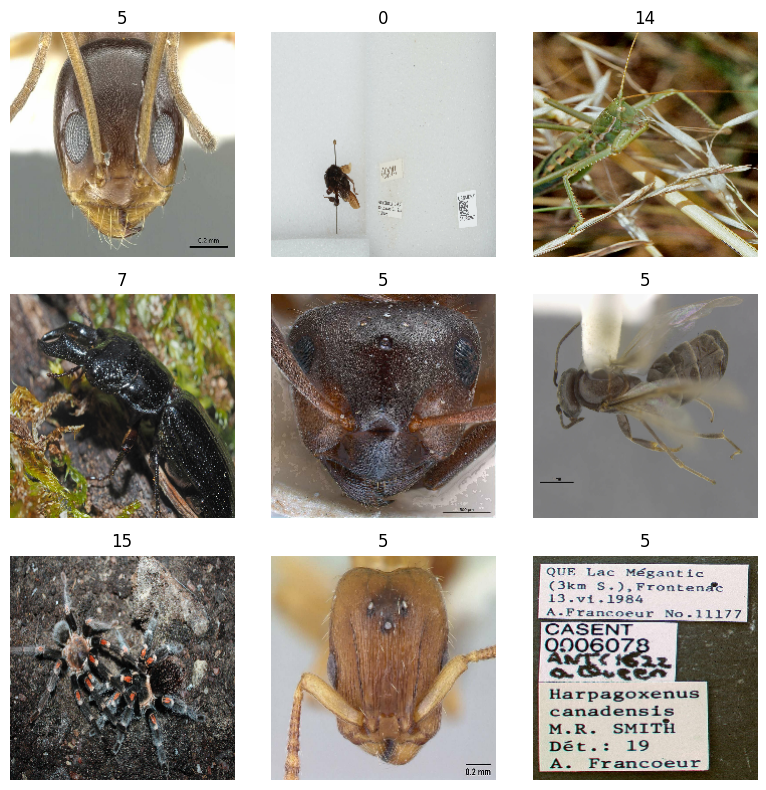

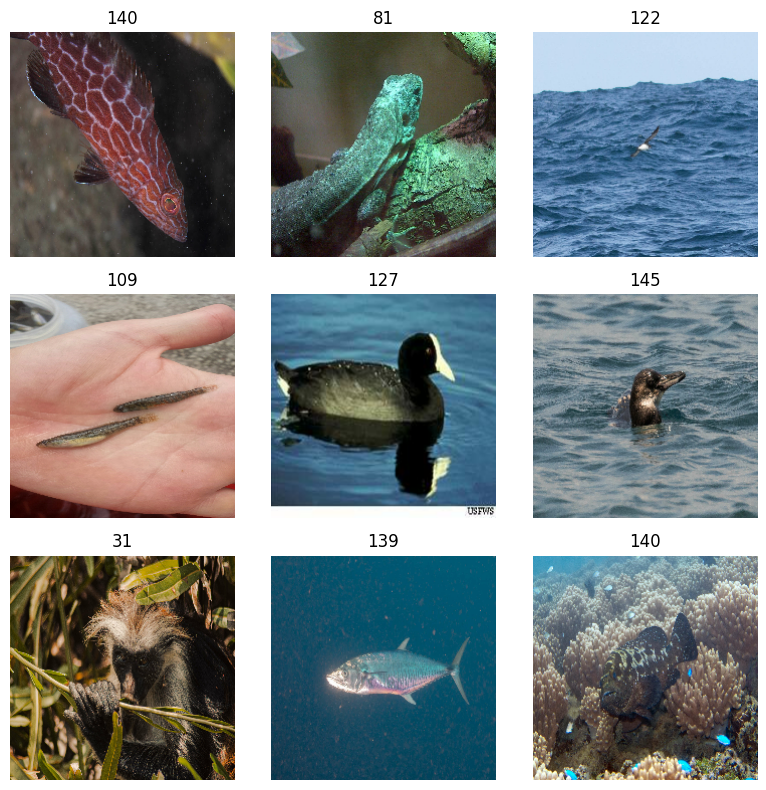

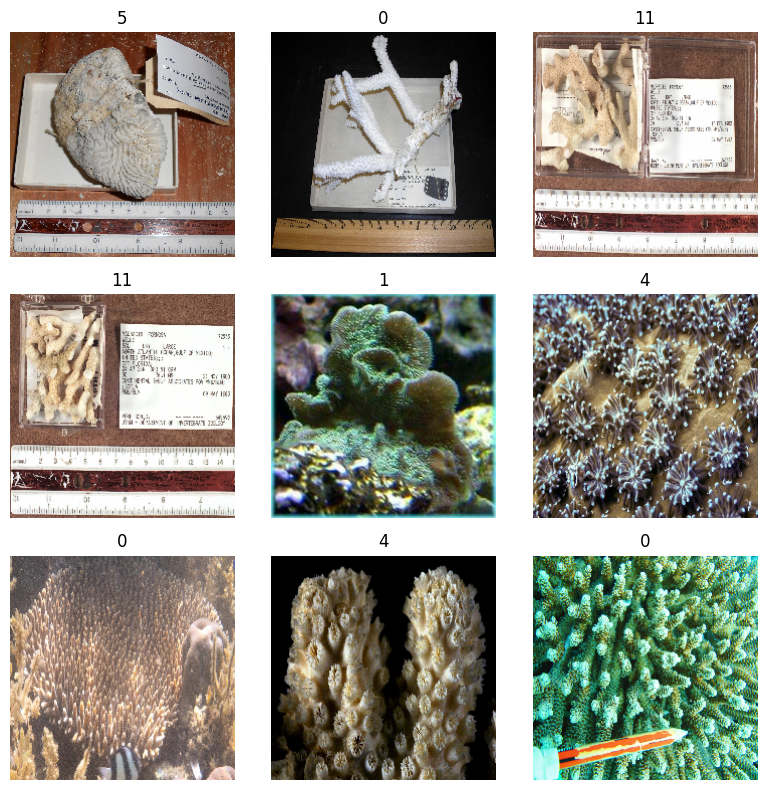

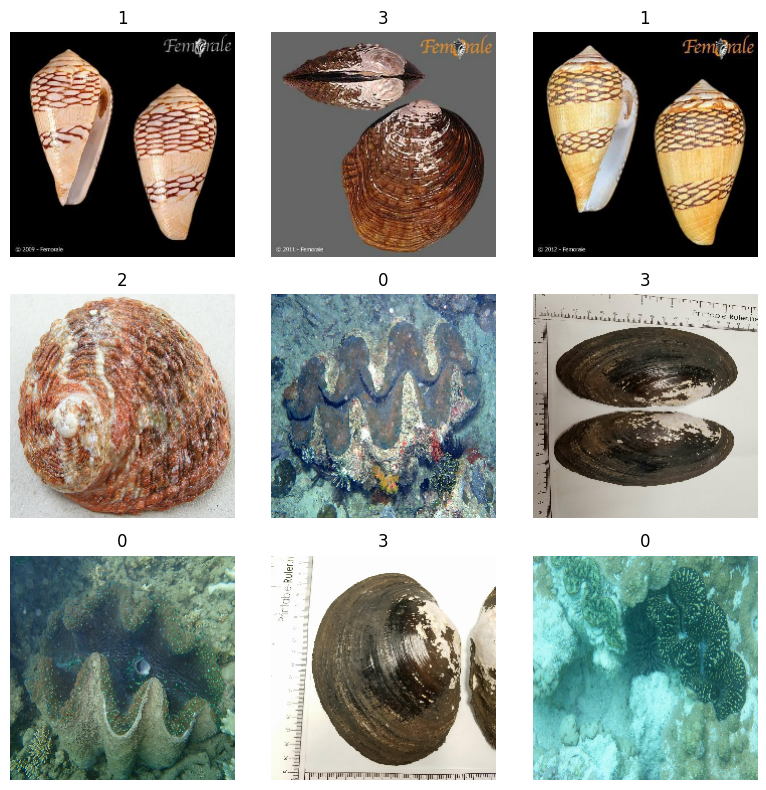

In [ ]:
display_images(train_ds_athoropa)
display_images(train_ds_chordata)
display_images(train_ds_cnidaria)
display_images(train_ds_mollusca)

# Data augmentation layer

## functions

In [ ]:
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

## Augmentation layer

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip(
        "horizontal"
    ),
    layers.RandomRotation(
        0.1
    ),
    layers.RandomZoom(
        height_factor=(-0.2, 0.3),  # zoom out up to 20%, zoom in up to 30%
        width_factor=(-0.2, 0.3),
        interpolation="bilinear",
    ),
    keras.layers.RandomColorDegeneration(
        factor=0.3,
        value_range=(0, 255),
    ),
 ## add any you want here
]

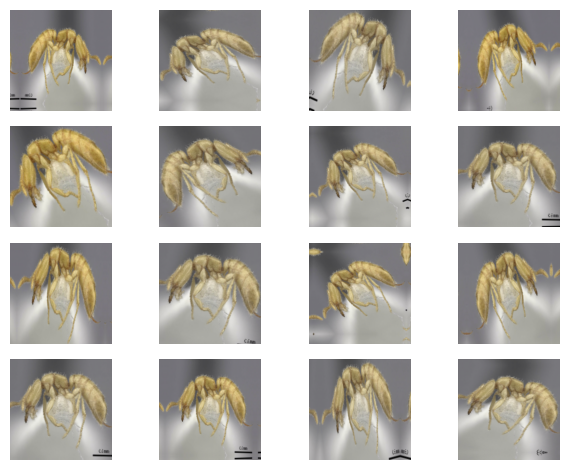

In [ ]:
## plot the result of augmentation layer
for images, _ in train_ds_athoropa.take(1):

    for i in range(16):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Model

Must instal:

python3.11 -m pip install pydot

brew install graphviz


In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Apply data augmentation
    x = data_augmentation(inputs)
    # Add a Rescaling layer
    x = layers.Rescaling(1.0 / 255)(x)

    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.1)(x)


    outputs = layers.Dense(num_classes, activation="softmax")(x) # as we deal with a lot of classes

    return keras.Model(inputs, outputs)

## model run


**number of class per phylum**

- anaphora = 17 classes.

- chordata = 166 classes.

- cnidaria = 13 classes.

- mollusca = 5 classes.


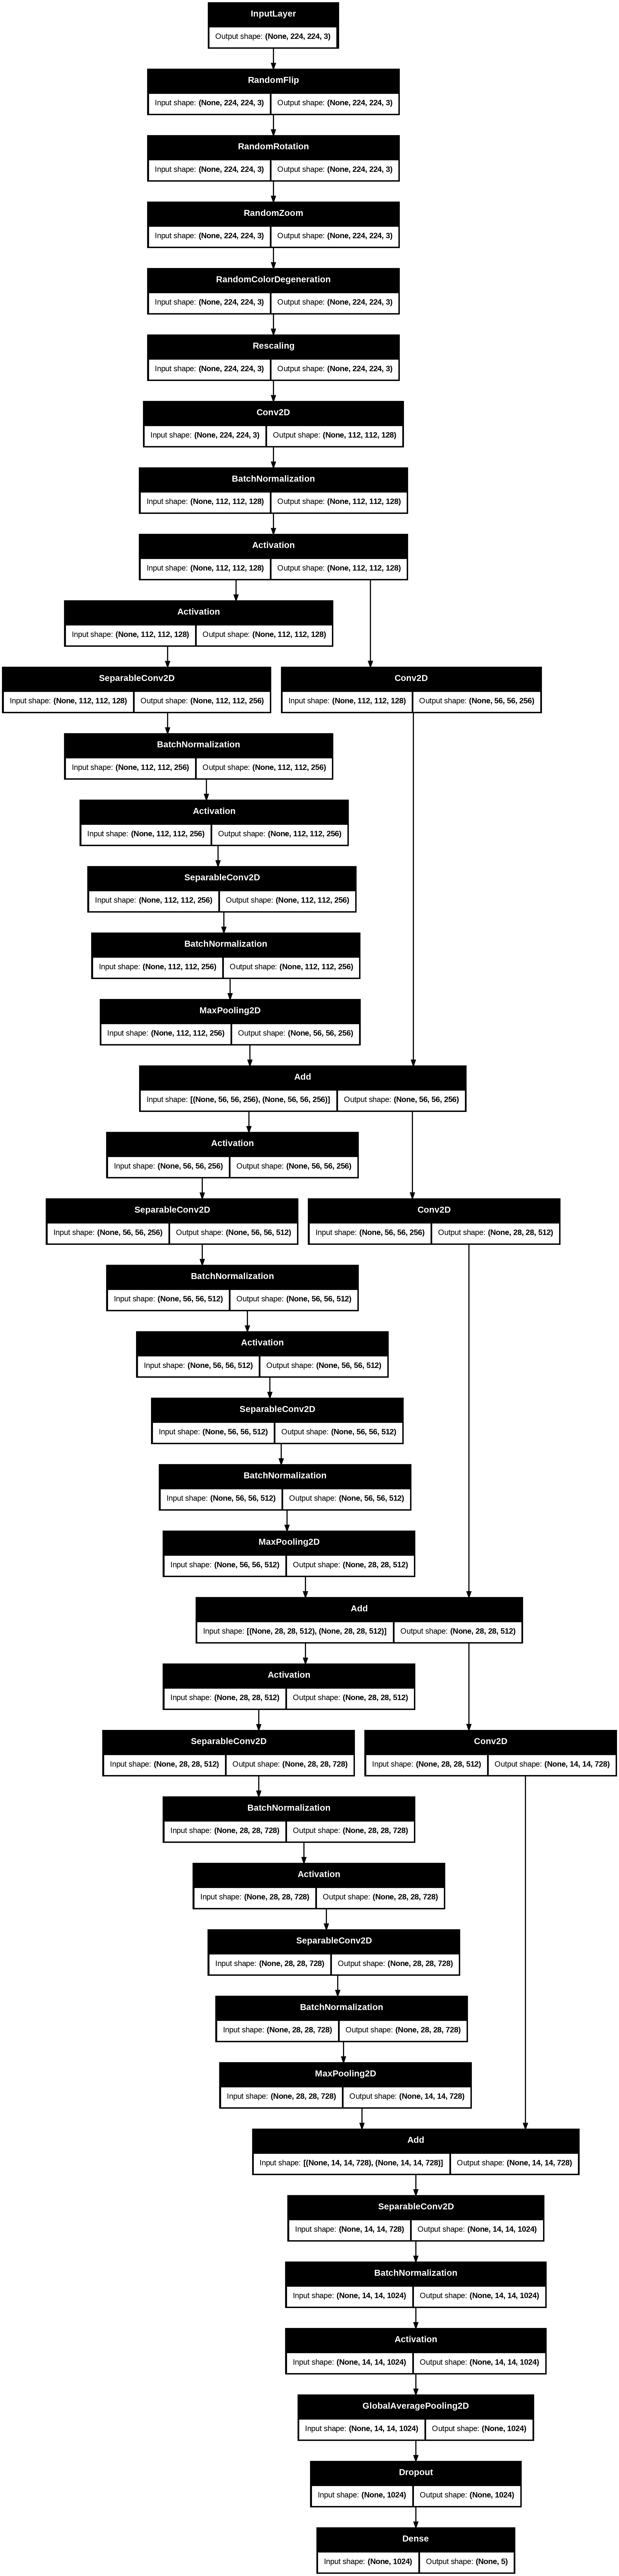

In [ ]:
model_athoropa = make_model(input_shape=image_size + (3,), num_classes=17)
keras.utils.plot_model(model_athoropa, show_shapes=True)

model_chordata = make_model(input_shape=image_size + (3,), num_classes=166)
keras.utils.plot_model(model_chordata, show_shapes=True)

model_cnidaria = make_model(input_shape=image_size + (3,), num_classes=13)
keras.utils.plot_model(model_cnidaria, show_shapes=True)

model_mollusca = make_model(input_shape=image_size + (3,), num_classes=5)
keras.utils.plot_model(model_mollusca, show_shapes=True)

In [ ]:
epochs = 20

# make the learning rate change over the epochs to avoid getting stuck
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-4,
    decay_steps=10000,
    decay_rate=0.9
)

callbacks = [
    # saves the best model of the run using max val_accuracy as a metric
    keras.callbacks.ModelCheckpoint(
        "best_model_example.keras",
        save_best_only=True,
        monitor="val_acc",
        mode="max",
        verbose=1)
    ]

## change from kera example is the loss function as we deal with a lot of classes
model_athoropa.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), ## change this CategoricalCrossentropy to the the one it is now
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")], ## change this CategoricalCrossentropy to the the one it is now
)

model_athoropa.fit(
    train_ds_athoropa,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds_athropoda,
)

# get the clasification report
best_model_example = keras.models.load_model("best_model_example.keras")
y_pred_probs = best_model_example.predict(val_ds_athropoda)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.concatenate([y for x, y in val_ds_athropoda], axis=0)

print(classification_report(y_true, y_pred))

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - acc: 0.5134 - loss: 1.5579
Epoch 1: val_acc improved from -inf to 0.16842, saving model to best_model_example.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 816ms/step - acc: 0.5122 - loss: 1.5613 - val_acc: 0.1684 - val_loss: 2.7660
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - acc: 0.5940 - loss: 1.3203
Epoch 2: val_acc improved from 0.16842 to 0.18421, saving model to best_model_example.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 837ms/step - acc: 0.5929 - loss: 1.3223 - val_acc: 0.1842 - val_loss: 2.7485
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - acc: 0.6246 - loss: 1.2470
Epoch 3: val_acc did not improve from 0.18421
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 825ms/step - acc: 0.6233 - loss: 1.2492 - val_acc: 0.1684 - val_loss: 2.7361
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - acc: 0.6562 - loss: 1.1377
Epoch 4: val_acc did not improve from 0.18421
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 764ms/step - acc: 0.6549 - loss: 1.1405 - val_ac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.18      1.00      0.30        32\n           1       0.00      0.00      0.00         6\n           2       0.00      0.00      0.00        11\n           3       0.00      0.00      0.00         7\n           4       0.38      0.60      0.46         5\n           5       0.00      0.00      0.00        61\n           6       0.00      0.00      0.00         7\n           7       0.00      0.00      0.00         4\n           8       0.00      0.00      0.00         9\n           9       0.00      0.00      0.00         8\n          10       0.00      0.00      0.00         7\n          11       0.00      0.00      0.00         7\n          12       0.00      0.00      0.00         7\n          13       0.00      0.00      0.00         9\n          14       0.00      0.00      0.00         3\n          15       0.00      0.00      0.00         2\n          16       0.00      0.00      0.00         5\n\n    a

## using a base model (chatgpt)

In [ ]:
def make_model_vgg16(input_shape, num_classes, value_range=(0, 255)):
    inputs = keras.Input(shape=input_shape)

    # Rescale and augment form class
    x = Rescaling(1./255)(inputs)
    x = RandAugment(value_range=value_range)(x)

    # Pretrained VGG16 base
    # use our top layers for preprocessing (include_top = false) is the pretrained weight (weights = imagenet)
    base_model = VGG16(include_top=False, input_tensor=x, weights="imagenet")
    base_model.trainable = False  # Freeze for transfer learning

    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dropout(0.1)(x)  # Optional regularization

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)


## model run

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


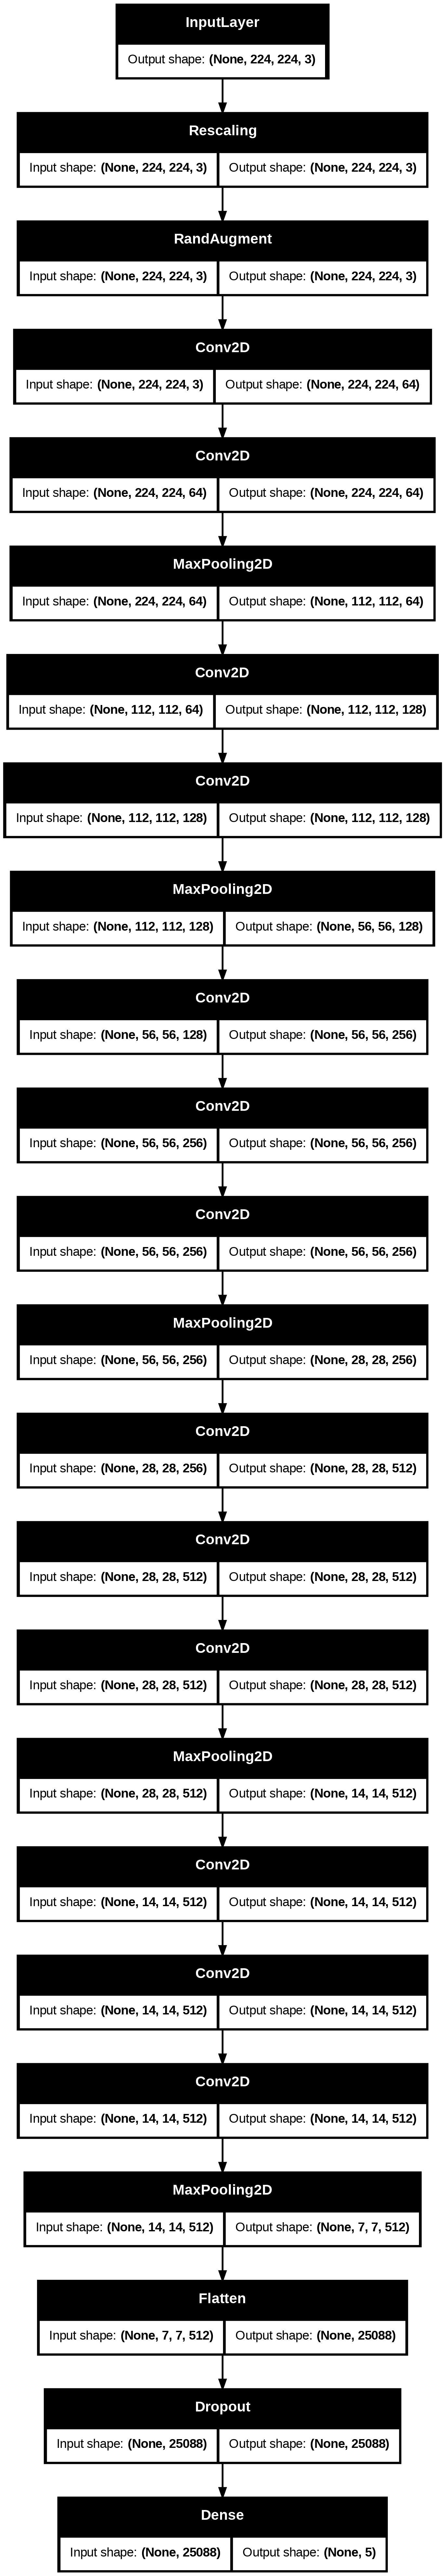

In [ ]:
model_base_athoropa = make_model_vgg16(input_shape=image_size + (3,), num_classes=17)
keras.utils.plot_model(model_base_athoropa, show_shapes=True)

model_base_chordata = make_model_vgg16(input_shape=image_size + (3,), num_classes=166)
keras.utils.plot_model(model_base_chordata, show_shapes=True)

model_base_cnidaria = make_model_vgg16(input_shape=image_size + (3,), num_classes=13)
keras.utils.plot_model(model_base_cnidaria, show_shapes=True)

model_base_mollusca = make_model_vgg16(input_shape=image_size + (3,), num_classes=5)
keras.utils.plot_model(model_base_mollusca, show_shapes=True)

In [ ]:
epochs = 50

# make the learning rate change over the epochs to avoid getting stuck
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)

callbacks = [
    # saves the best model of the run using max val_accuracy as a metric
    keras.callbacks.ModelCheckpoint(
        "best_model_vgg16.keras",
        save_best_only=True,
        monitor="val_acc",
        mode="max",
        verbose=1)
    ]


## change from kera example is the loss function as we deal with a lot of classes
model_base_athoropa.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), # apparently good learning rate for pretrained model
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), ## change this CategoricalCrossentropy to the the one it is now
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")], ## change this CategoricalCrossentropy to the the one it is now
)

model_base_athoropa.fit(
    train_ds_athoropa,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds_athropoda,
)

# get the clasification report
best_model_vgg16 = keras.models.load_model("best_model_vgg16.keras")
y_pred_probs = best_model_vgg16.predict(val_ds_athropoda)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.concatenate([y for x, y in val_ds_athropoda], axis=0)

print(classification_report(y_true, y_pred))

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - acc: 0.2724 - loss: 3.0169
Epoch 1: val_acc improved from -inf to 0.42105, saving model to best_model_vgg16.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 719ms/step - acc: 0.2715 - loss: 3.0176 - val_acc: 0.4211 - val_loss: 2.7075
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - acc: 0.3234 - loss: 2.4938
Epoch 2: val_acc did not improve from 0.42105
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 522ms/step - acc: 0.3223 - loss: 2.4993 - val_acc: 0.4211 - val_loss: 2.7503
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - acc: 0.3061 - loss: 2.4894
Epoch 3: val_acc improved from 0.42105 to 0.44211, saving model to best_model_vgg16.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 538ms/step - acc: 0.3062 - loss: 2.4906 - val_acc: 0.4421 - val_loss: 2.9430
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - acc: 0.3401 - loss: 2.3376
Epoch 4: val_acc improved from 0.44211 to 0.48421, saving model to best_model_vgg16.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 475ms/st

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.81      0.94      0.87        32\n           1       0.00      0.00      0.00         6\n           2       0.67      0.36      0.47        11\n           3       0.50      0.29      0.36         7\n           4       0.25      0.20      0.22         5\n           5       0.83      0.82      0.83        61\n           6       0.21      0.57      0.31         7\n           7       0.00      0.00      0.00         4\n           8       0.75      0.33      0.46         9\n           9       0.28      0.88      0.42         8\n          10       0.86      0.86      0.86         7\n          11       0.00      0.00      0.00         7\n          12       1.00      0.14      0.25         7\n          13       0.40      0.22      0.29         9\n          14       0.50      0.33      0.40         3\n          15       0.10      0.50      0.17         2\n          16       0.33      0.40      0.36         5\n\n    a

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, Xception, DenseNet121
from tensorflow.keras.layers import Rescaling
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Model creation functions for different architectures
def make_model_vgg16(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Rescaling layer
    x = RandAugment(value_range= (0, 255))(inputs)
    x = Rescaling(1./255)(x)

    # Pretrained VGG16 base
    base_model = VGG16(include_top=False, input_tensor=x, weights="imagenet")
    base_model.trainable = False  # Freeze for transfer learning

    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dropout(0.1)(x)  # Optional regularization

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

def make_model_resnet50(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Rescaling layer
    x = RandAugment(value_range= (0, 255))(inputs)
    x = Rescaling(1./255)(x)

    # Pretrained ResNet50 base
    base_model = ResNet50(include_top=False, input_tensor=x, weights="imagenet")
    base_model.trainable = False  # Freeze for transfer learning

    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dropout(0.1)(x)  # Optional regularization

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

def make_model_mobilenetv2(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Rescaling layer
    x = RandAugment(value_range= (0, 255))(inputs)
    x = Rescaling(1./255)(x)

    # Pretrained MobileNetV2 base
    base_model = MobileNetV2(include_top=False, input_tensor=x, weights="imagenet")
    base_model.trainable = False  # Freeze for transfer learning

    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dropout(0.1)(x)  # Optional regularization

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

def make_model_xception(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Rescaling layer
    x = RandAugment(value_range= (0, 255))(inputs)
    x = Rescaling(1./255)(x)

    # Pretrained Xception base
    base_model = Xception(include_top=False, input_tensor=x, weights="imagenet")
    base_model.trainable = False  # Freeze for transfer learning

    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dropout(0.1)(x)  # Optional regularization

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

def make_model_densenet121(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Rescaling layer
    x = RandAugment(value_range= (0, 255))(inputs)
    x = Rescaling(1./255)(x)

    # Pretrained DenseNet121 base
    base_model = DenseNet121(include_top=False, input_tensor=x, weights="imagenet")
    base_model.trainable = False  # Freeze for transfer learning

    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dropout(0.1)(x)  # Optional regularization

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name, train_ds, val_ds, epochs=50):
    """Train and evaluate a model, saving the best version"""

    # Learning rate schedule
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,
        decay_steps=10000,
        decay_rate=0.9
    )

    # Callbacks
    checkpoint_path = f"best_model_{model_name}.keras"
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            checkpoint_path,
            save_best_only=True,
            monitor="val_acc",
            mode="max",
            verbose=1
        )
    ]

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )

    # Train the model
    history = model.fit(
        train_ds,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=val_ds,
    )

    # Load the best model
    best_model = keras.models.load_model(checkpoint_path)

    # Get predictions
    y_pred_probs = best_model.predict(val_ds)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Get true labels
    y_true = np.concatenate([y for x, y in val_ds], axis=0)

    # Print classification report
    print(f"\nClassification Report for {model_name}:")
    report = classification_report(y_true, y_pred, output_dict=True)
    print(classification_report(y_true, y_pred))

    # Return metrics and paths
    return {
        'model_name': model_name,
        'history': history.history,
        'accuracy': report['accuracy'],
        'f1_macro': report['macro avg']['f1-score'],
        'f1_weighted': report['weighted avg']['f1-score'],
        'model_path': checkpoint_path
    }

# Function to compare models
def compare_models(results, dataset_name):
    """Compare results from multiple models"""

    # Create comparison DataFrame
    comparison = pd.DataFrame([
        {'Model': r['model_name'],
         'Accuracy': r['accuracy'],
         'F1 (Macro)': r['f1_macro'],
         'F1 (Weighted)': r['f1_weighted']}
        for r in results
    ])

    # Sort by accuracy
    comparison = comparison.sort_values('Accuracy', ascending=False)

    # Print results
    print(f"\n=== Model Comparison for {dataset_name} ===")
    print(comparison)

    # Create visualization
    plt.figure(figsize=(12, 6))

    # Plot accuracy comparison
    plt.subplot(1, 2, 1)
    plt.bar(comparison['Model'], comparison['Accuracy'])
    plt.title('Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    # Plot F1 comparison
    plt.subplot(1, 2, 2)
    plt.bar(comparison['Model'], comparison['F1 (Weighted)'])
    plt.title('F1 Score (Weighted) Comparison')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.savefig(f'model_comparison_{dataset_name}.png')
    plt.show()

    # Print best model
    best_model = comparison.iloc[0]
    print(f"\nBest model for {dataset_name}: {best_model['Model']}")
    print(f"Accuracy: {best_model['Accuracy']:.4f}")
    print(f"F1 Score (Weighted): {best_model['F1 (Weighted)']:.4f}")

    return comparison

# Function to plot learning curves
def plot_learning_curves(results, dataset_name):
    """Plot learning curves for all models"""

    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    for result in results:
        plt.plot(result['history']['acc'], label=f"{result['model_name']} (Train)")
        plt.plot(result['history']['val_acc'], label=f"{result['model_name']} (Val)", linestyle='--')

    plt.title(f'Accuracy - {dataset_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    for result in results:
        plt.plot(result['history']['loss'], label=f"{result['model_name']} (Train)")
        plt.plot(result['history']['val_loss'], label=f"{result['model_name']} (Val)", linestyle='--')

    plt.title(f'Loss - {dataset_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'learning_curves_{dataset_name}.png')
    plt.show()

#############################
# EXAMPLE USAGE (ARTHROPODA DATASET)
#############################

# Parameters
image_size = (224, 224)  # Standard size for most models
epochs = 50

# # Create models
# print("Creating models...")
# model_vgg16_arthropoda = make_model_vgg16(input_shape=image_size + (3,), num_classes=17)
# print("VGG16 model created")

# model_resnet50_arthropoda = make_model_resnet50(input_shape=image_size + (3,), num_classes=17)
# print("ResNet50 model created")

# model_mobilenet_arthropoda = make_model_mobilenetv2(input_shape=image_size + (3,), num_classes=17)
# print("MobileNetV2 model created")

# # Train and evaluate models
# results_arthropoda = []

# # Train VGG16
# print("\n=== Training VGG16 on arthropoda dataset ===")
# result_vgg16 = train_and_evaluate_model(
#     model=model_vgg16_arthropoda,
#     model_name="vgg16",
#     train_ds=train_ds_athoropa,
#     val_ds=val_ds_athropoda,
#     epochs=epochs
# )
# results_arthropoda.append(result_vgg16)

# # Train ResNet50
# print("\n=== Training ResNet50 on arthropoda dataset ===")
# result_resnet50 = train_and_evaluate_model(
#     model=model_resnet50_arthropoda,
#     model_name="resnet50",
#     train_ds=train_ds_athoropa,
#     val_ds=val_ds_athropoda,
#     epochs=epochs
# )
# results_arthropoda.append(result_resnet50)

# # Train MobileNetV2
# print("\n=== Training MobileNetV2 on arthropoda dataset ===")
# result_mobilenet = train_and_evaluate_model(
#     model=model_mobilenet_arthropoda,
#     model_name="mobilenetv2",
#     train_ds=train_ds_athoropa,
#     val_ds=val_ds_athropoda,
#     epochs=epochs
# )
# results_arthropoda.append(result_mobilenet)

# # Compare models
# compare_models(results_arthropoda, "Arthropoda")

# # Plot learning curves
# plot_learning_curves(results_arthropoda, "Arthropoda")


"""
# Create models for Chordata
model_vgg16_chordata = make_model_vgg16(input_shape=image_size + (3,), num_classes=166)
model_resnet50_chordata = make_model_resnet50(input_shape=image_size + (3,), num_classes=166)
model_mobilenet_chordata = make_model_mobilenetv2(input_shape=image_size + (3,), num_classes=166)

# Train and evaluate models
results_chordata = []

# Train VGG16
print("\n=== Training VGG16 on chordata dataset ===")
result_vgg16 = train_and_evaluate_model(
    model=model_vgg16_chordata,
    model_name="vgg16",
    train_ds=train_ds_chordata,
    val_ds=val_ds_chordata,
    epochs=epochs
)
results_chordata.append(result_vgg16)

# Train ResNet50
print("\n=== Training ResNet50 on chordata dataset ===")
result_resnet50 = train_and_evaluate_model(
    model=model_resnet50_chordata,
    model_name="resnet50",
    train_ds=train_ds_chordata,
    val_ds=val_ds_chordata,
    epochs=epochs
)
results_chordata.append(result_resnet50)

# Train MobileNetV2
print("\n=== Training MobileNetV2 on chordata dataset ===")
result_mobilenet = train_and_evaluate_model(
    model=model_mobilenet_chordata,
    model_name="mobilenetv2",
    train_ds=train_ds_chordata,
    val_ds=val_ds_chordata,
    epochs=epochs
)
results_chordata.append(result_mobilenet)

# Compare models
compare_models(results_chordata, "Chordata")

# Plot learning curves
plot_learning_curves(results_chordata, "Chordata")
"""

# Similarly for Cnidaria and Mollusca datasets (uncomment when ready)

Creating models...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
VGG16 model created
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
ResNet50 model created


<ipython-input-8-33a772f12a41>:58: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_tensor=x, weights="imagenet")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
MobileNetV2 model created

=== Training VGG16 on arthropoda dataset ===
Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - acc: 0.3817 - loss: 2.7915
Epoch 1: val_acc improved from -inf to 0.38947, saving model to best_model_vgg16.keras
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 946ms/step - acc: 0.3832 - loss: 2.7809 - val_acc: 0.3895 - val_loss: 2.2621
Epoch 2/50


KeyboardInterrupt: 

In [ ]:
model_vgg16_chordata = make_model_vgg16(input_shape=image_size + (3,), num_classes=166)
model_resnet50_chordata = make_model_resnet50(input_shape=image_size + (3,), num_classes=166)
model_mobilenet_chordata = make_model_mobilenetv2(input_shape=image_size + (3,), num_classes=166)

# Train and evaluate models
results_chordata = []

# Train VGG16
print("\n=== Training VGG16 on chordata dataset ===")
result_vgg16 = train_and_evaluate_model(
    model=model_vgg16_chordata,
    model_name="vgg16",
    train_ds=train_ds_chordata,
    val_ds=val_ds_chordata,
    epochs=epochs
)
results_chordata.append(result_vgg16)

# Train ResNet50
print("\n=== Training ResNet50 on chordata dataset ===")
result_resnet50 = train_and_evaluate_model(
    model=model_resnet50_chordata,
    model_name="resnet50",
    train_ds=train_ds_chordata,
    val_ds=val_ds_chordata,
    epochs=epochs
)
results_chordata.append(result_resnet50)

# Train MobileNetV2
print("\n=== Training MobileNetV2 on chordata dataset ===")
result_mobilenet = train_and_evaluate_model(
    model=model_mobilenet_chordata,
    model_name="mobilenetv2",
    train_ds=train_ds_chordata,
    val_ds=val_ds_chordata,
    epochs=epochs
)
results_chordata.append(result_mobilenet)

# Compare models
compare_models(results_chordata, "Chordata")

# Plot learning curves
plot_learning_curves(results_chordata, "Chordata")

<ipython-input-8-33a772f12a41>:58: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_tensor=x, weights="imagenet")



=== Training VGG16 on chordata dataset ===
Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - acc: 0.0541 - loss: 6.6866
Epoch 1: val_acc improved from -inf to 0.09648, saving model to best_model_vgg16.keras
249/249 ━━━━━━━━━━━━━━━━━━━━ 185s 740ms/step - acc: 0.0541 - loss: 6.6852 - val_acc: 0.0965 - val_loss: 6.1600
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - acc: 0.1410 - loss: 5.2637
Epoch 2: val_acc improved from 0.09648 to 0.13216, saving model to best_model_vgg16.keras
249/249 ━━━━━━━━━━━━━━━━━━━━ 189s 687ms/step - acc: 0.1410 - loss: 5.2647 - val_acc: 0.1322 - val_loss: 5.6675
Epoch 3/50
234/249 ━━━━━━━━━━━━━━━━━━━━ 7s 505ms/step - acc: 0.1655 - loss: 5.0724